In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator

In [2]:
df_confirmed = pd.read_csv("/content/drive/MyDrive/covid data/time_series_covid19_confirmed_global.csv")
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216,120216,120216,120216,125937,127464,129021,130113,131586,131586,131586,134653,134653,136643,137853,137853,137853,137853,141489,142414,142414,143183,143439,143439,143439
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,132629,132647,132665,132686,132697,132740,132763,132797,132828,132853,132875
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,149906,151103,152210,153309,154486,155784,157005,158213,159563,160868,162155
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,14239,14273,14273,14273,14359,14379,14379,14464,14498,14498,14498
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,40530,40631,40707,40805,40906,41061,41227,41405,41405,41736,41780


In [3]:
df_confirmed.shape

(279, 555)

In [4]:
df_confirmed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Columns: 555 entries, Province/State to 7/25/21
dtypes: float64(2), int64(551), object(2)
memory usage: 1.2+ MB


In [5]:
df_confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21
count,277.000000,277.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,...,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02,2.790000e+02
mean,20.305266,22.500100,1.996416,2.347670,3.372760,5.136201,7.591398,10.491039,19.992832,22.103943,29.516129,35.580645,43.146953,60.168459,71.279570,85.655914,99.078853,110.405018,123.283154,133.082437,143.942652,153.293907,160.612903,162.111111,216.422939,239.817204,247.498208,255.322581,262.616487,269.362007,271.154122,273.161290,275.415771,281.727599,283.089606,285.111111,288.172043,291.673835,296.548387,301.516129,...,6.345634e+05,6.359702e+05,6.374253e+05,6.386704e+05,6.397468e+05,6.408126e+05,6.421467e+05,6.437135e+05,6.451609e+05,6.466726e+05,6.479732e+05,6.490841e+05,6.502734e+05,6.516505e+05,6.530569e+05,6.546308e+05,6.562188e+05,6.575633e+05,6.587350e+05,6.600674e+05,6.616940e+05,6.633566e+05,6.650826e+05,6.669040e+05,6.684325e+05,6.697384e+05,6.713124e+05,6.731768e+05,6.751129e+05,6.771537e+05,6.793041e+05,6.809981e+05,6.825031e+05,6.842870e+05,6.861846e+05,6.881902e+05,6.902293e+05,6.923505e+05,6.943760e+05,6.959254e+05
std,25.206138,75.408236,26.637656,26.735265,33.284971,46.326447,64.742529,87.231432,214.047295,215.362435,296.778990,351.860532,432.981669,672.864127,813.397923,1002.471555,1181.334181,1327.975179,1498.072088,1626.683092,1778.106467,1903.580090,2001.624224,2001.962023,2888.441265,3259.166926,3369.459866,3485.112533,3593.210944,3694.489864,3715.396732,3739.969404,3753.204644,3838.236060,3838.277974,3850.497244,3880.393819,3904.575241,3929.608214,3949.608526,...,2.973133e+06,2.977776e+06,2.983270e+06,2.987804e+06,2.991180e+06,2.994382e+06,2.998939e+06,3.004315e+06,3.008789e+06,3.013712e+06,3.017686e+06,3.020690e+06,3.023794e+06,3.027843e+06,3.031668e+06,3.035983e+06,3.040808e+06,3.044294e+06,3.047036e+06,3.049708e+06,3.054280e+06,3.058751e+06,3.063059e+06,3.068519e+06,3.072080e+06,3.074761e+06,3.078476e+06,3.082833e+06,3.087736e+06,3.092418e+06,3.098917e+06,3.102568e+06,3.105954e+06,3.110416e+06,3.115193e+06,3.120900e+06,3.126425e+06,3.134434e+06,3.140033e+06,3.143241e+06
min,-51.796300,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0

In [6]:
latest_data = pd.read_csv("/content/drive/MyDrive/covid data/07-25-2021.csv")
latest_data

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-07-26 04:21:28,33.939110,67.709953,143439,6357,82586.0,54496.0,Afghanistan,368.469337,4.431849
1,NaN,NaN,NaN,Albania,2021-07-26 04:21:28,41.153300,20.168300,132875,2456,130139.0,280.0,Albania,4617.242338,1.848354
2,NaN,NaN,NaN,Algeria,2021-07-26 04:21:28,28.033900,1.659600,162155,4063,110577.0,47515.0,Algeria,369.785959,2.505627
3,NaN,NaN,NaN,Andorra,2021-07-26 04:21:28,42.506300,1.521800,14498,127,13988.0,383.0,Andorra,18763.994046,0.875983
4,NaN,NaN,NaN,Angola,2021-07-26 04:21:28,-11.202700,17.873900,41780,984,35474.0,5322.0,Angola,127.121217,2.355194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,NaN,NaN,NaN,Vietnam,2021-07-26 04:21:28,14.058324,108.277199,101173,370,19342.0,81461.0,Vietnam,103.939257,0.365710
3983,NaN,NaN,NaN,West Bank and Gaza,2021-07-26 04:21:28,31.952200,35.233200,316088,3599,311526.0,963.0,West Bank and Gaza,6196.083597,1.138607
3984,NaN,NaN,NaN,Yemen,2021-07-26 04:21:28,15.552727,48.516388,7012,1373,4166.0,1473.0,Yemen,23.509715,19.580719
3985,NaN,NaN,NaN,Zambia,2021-07-26 04:21:28,-13.133897,27.849332,192071,3272,181638.0,7161.0,Zambia,1044.775129,1.703537


In [7]:
latest_data.shape

(3987, 14)

In [8]:
df_deaths = pd.read_csv("/content/drive/MyDrive/covid data/time_series_covid19_deaths_global.csv")
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3683,3842,3934,3934,3934,4215,4293,4366,4452,4519,4519,4519,4730,4794,4871,4962,4962,4962,4962,5283,5360,5415,5477,5561,5561,5561,5791,5791,5923,5983,5983,5983,5983,6213,6266,6266,6325,6357,6357,6357
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2454,2454,2454,2454,2454,2454,2455,2455,2455,2455,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3598,3605,3615,3624,3631,3641,3650,3660,3669,3678,3685,3693,3699,3708,3716,3726,3735,3745,3755,3765,3775,3786,3798,3811,3824,3836,3851,3867,3882,3895,3910,3922,3938,3956,3979,3994,4008,4026,4042,4063
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,847,851,853,856,859,868,875,878,881,883,887,889,891,894,900,903,906,910,913,915,920,925,925,928,929,935,939,941,946,951,952,954,957,969,970,973,977,977,982,984


In [9]:
cols = df_confirmed.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/16/21', '7/17/21', '7/18/21', '7/19/21', '7/20/21', '7/21/21',
       '7/22/21', '7/23/21', '7/24/21', '7/25/21'],
      dtype='object', length=555)

In [10]:
confirmed = df_confirmed.loc[:, cols[4]:cols[-1]]
deaths = df_deaths.loc[:, cols[4]:cols[-1]]

In [11]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216,120216,120216,120216,125937,127464,129021,130113,131586,131586,131586,134653,134653,136643,137853,137853,137853,137853,141489,142414,142414,143183,143439,143439,143439
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,132629,132647,132665,132686,132697,132740,132763,132797,132828,132853,132875
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,149906,151103,152210,153309,154486,155784,157005,158213,159563,160868,162155
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,14239,14273,14273,14273,14359,14379,14379,14464,14498,14498,14498
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,40530,40631,40707,40805,40906,41061,41227,41405,41405,41736,41780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,11794,12150,12508,12978,13258,13530,13782,13989,14323,14537,15325,15740,16136,16507,17052,17727,18121,19310,20261,21312,22341,23385,24810,26608,28470,30478,32665,35409,38239,42288,46292,51002,55845,60180,65607,71144,78269,78269,94913,101173
275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,312164,312334,312499,312605,312673,312811,313015,313015,313015,313520,313520,313721,313851,313851,314167,314288,314409,314492,314569,314569,314780,314869,314869,315047,315107,315160,315224,315224,315409,315504,315504,315641,315641,315761,315761,315876,315876,315968,315968,316088
276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6867,6869,6875,6877,6885,6889,6892,6898,6905,6905,6906,6908,6909,6918,6920,6923,6924,6926,6929,6929,6931,6934,6936,6940,6941,6948,6952,6961,6964,6967,6972,6977,6981,6987,6992,6997,7001,7003,7008,7012
277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,118850,122244,125157,126973,129033,130631,133659,137026,140620,143215,146031,148568,149661,152056,154948,157832,160613,162487,164282,165513,167132,169003,170456,172405,174789,175729,176742,178748,180549,

In [12]:
deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,7/17/21,7/18/21,7/19/21,7/20/21,7/21/21,7/22/21,7/23/21,7/24/21,7/25/21
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3683,3842,3934,3934,3934,4215,4293,4366,4452,4519,4519,4519,4730,4794,4871,4962,4962,4962,4962,5283,5360,5415,5477,5561,5561,5561,5791,5791,5923,5983,5983,5983,5983,6213,6266,6266,6325,6357,6357,6357
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2454,2454,2454,2454,2454,2454,2455,2455,2455,2455,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3598,3605,3615,3624,3631,3641,3650,3660,3669,3678,3685,3693,3699,3708,3716,3726,3735,3745,3755,3765,3775,3786,3798,3811,3824,3836,3851,3867,3882,3895,3910,3922,3938,3956,3979,3994,4008,4026,4042,4063
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,847,851,853,856,859,868,875,878,881,883,887,889,891,894,900,903,906,910,913,915,920,925,925,928,929,935,939,941,946,951,952,954,957,969,970,973,977,977,982,984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,61,61,62,64,66,69,69,70,72,74,74,76,78,80,81,81,84,84,86,90,97,102,104,110,112,119,125,132,138,207,225,225,254,334,334,370,370,370,370,370
275,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3544,3545,3548,3550,3551,3554,3555,3555,3555,3556,3556,3559,3561,3561,3563,3565,3570,3570,3573,3573,3576,3577,3577,3579,3580,3582,3582,3582,3585,3585,3585,3587,3587,3589,3589,3591,3591,3596,3596,3599
276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1351,1351,1352,1353,1355,1355,1355,1355,1356,1357,1358,1360,1361,1361,1361,1361,1361,1361,1361,1362,1363,1364,1365,1366,1366,1366,1366,1366,1366,1366,1366,1368,1368,1370,1371,1371,1372,1372,1373,1373
277,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1492,1525,1554,1595,1644,1691,1744,1794,1855,1915,1967,2022,2091,2138,2199,2271,2341,2397,2443,2492,2559,2618,2672,2736,2775,2822,2867,2904,2949,2991,3022,3052,3084,3113,3138,3162,3196,3221,3250,3272


In [13]:
dates = confirmed.keys()
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '7/16/21', '7/17/21', '7/18/21', '7/19/21', '7/20/21', '7/21/21',
       '7/22/21', '7/23/21', '7/24/21', '7/25/21'],
      dtype='object', length=551)

In [14]:
world_cases=[]
total_deaths=[]
mortality_rate=[]

for i in dates:
    confirmed_sum = confirmed[i].sum()
    deaths_sum = deaths[i].sum()

    world_cases.append(confirmed_sum)
    total_deaths.append(deaths_sum)

    mortality_rate.append(deaths_sum / confirmed_sum)



In [15]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d


In [16]:
def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average


In [17]:
window = 7

In [18]:
# confirmed
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

In [19]:
# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)

In [20]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)


In [21]:
world_cases = np.array(world_cases).reshape(-1, 1)


In [22]:
total_deaths = np.array(total_deaths).reshape(-1, 1)


In [23]:
future_days = 10
future_forecast = np.array([i for i in range (len(dates)+future_days)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]


In [24]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))



In [25]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], world_cases[50:], test_size=0.03, shuffle=False) 


In [26]:
print(X_train_confirmed.shape)
print(X_test_confirmed.shape)
print(y_train_confirmed.shape)
print(y_test_confirmed.shape)

(485, 1)
(16, 1)
(485, 1)
(16, 1)


In [27]:
# we will use polynomial regression

#Poly

poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [28]:
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)


In [29]:
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 685717.8214525301
MSE: 718152273633.0605


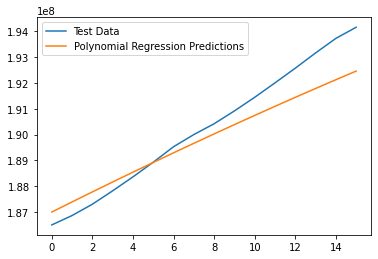

In [30]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [31]:
def flatten(arr):
    a = [] 
    arr = arr.tolist()
    for i in arr:
        a.append(i[0])
    return a

In [32]:
adjusted_dates.reshape(1,-1)
adjusted_dates.shape

(551, 1)

In [33]:
adjusted_dates.reshape(1,-1)[0]
adjusted_dates[0].shape

(1,)

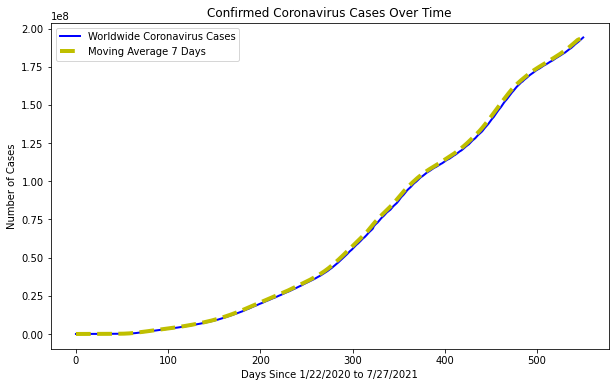

In [34]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(10,6))
plt.plot(adjusted_dates, world_cases, "b-", linewidth = "2")
plt.plot(adjusted_dates, world_confirmed_avg, "y--", linewidth = "4")
plt.title('Confirmed Coronavirus Cases Over Time')
plt.xlabel('Days Since 1/22/2020 to 7/27/2021')
plt.ylabel('Number of Cases')
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(window)])
plt.show()

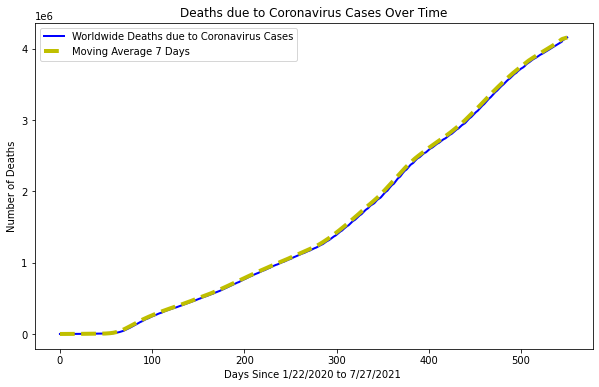

In [35]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(10,6))
plt.plot(adjusted_dates, total_deaths, "b-", linewidth = "2")
plt.plot(adjusted_dates, world_death_avg, "y--", linewidth = "4")
plt.title('Deaths due to Coronavirus Cases Over Time')
plt.xlabel('Days Since 1/22/2020 to 7/27/2021 ')
plt.ylabel('Number of Deaths')
plt.legend(['Worldwide Deaths due to Coronavirus Cases', 'Moving Average {} Days'.format(window)])
plt.show()

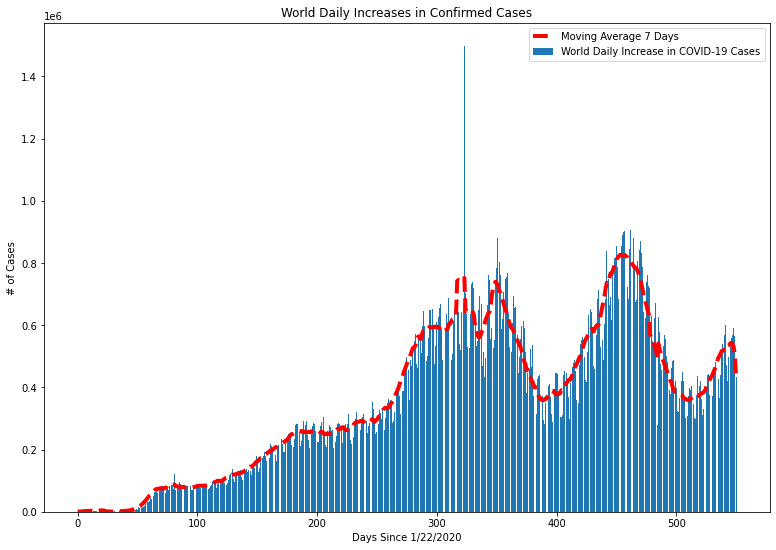

In [36]:
plt.figure(figsize=(13,9))
plt.bar(adjusted_dates.reshape(len(adjusted_dates)), world_daily_increase)
plt.plot(adjusted_dates, world_daily_increase_avg, "r--", linewidth = "4")
plt.title('World Daily Increases in Confirmed Cases')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('# of Cases')
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'])
plt.show()

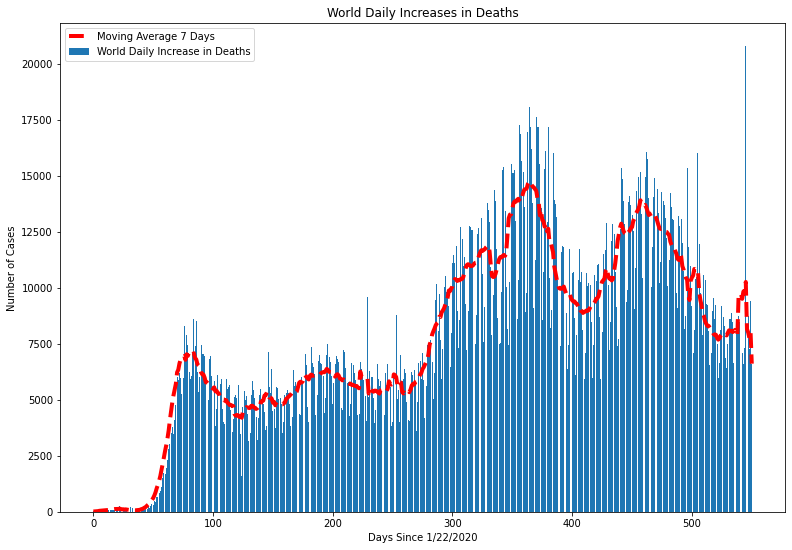

In [37]:
plt.figure(figsize=(13,9))
plt.bar(adjusted_dates.reshape(len(adjusted_dates)), world_daily_death)
plt.plot(adjusted_dates, world_daily_death_avg, "r--", linewidth = "4")
plt.title('World Daily Increases in Deaths')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('Number of Cases')
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in Deaths'])
plt.show()

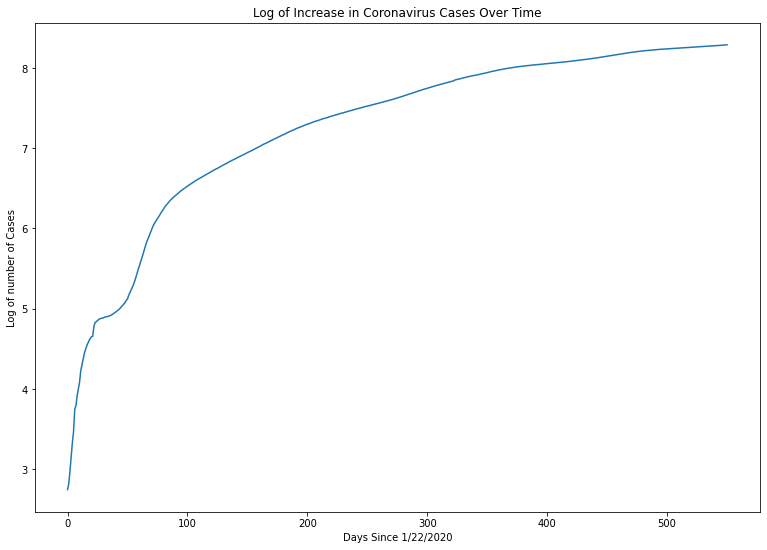

In [38]:
plt.figure(figsize=(13,9))
plt.plot(adjusted_dates, np.log10(world_cases))
plt.title('Log of Increase in Coronavirus Cases Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('Log of number of Cases')
plt.show()

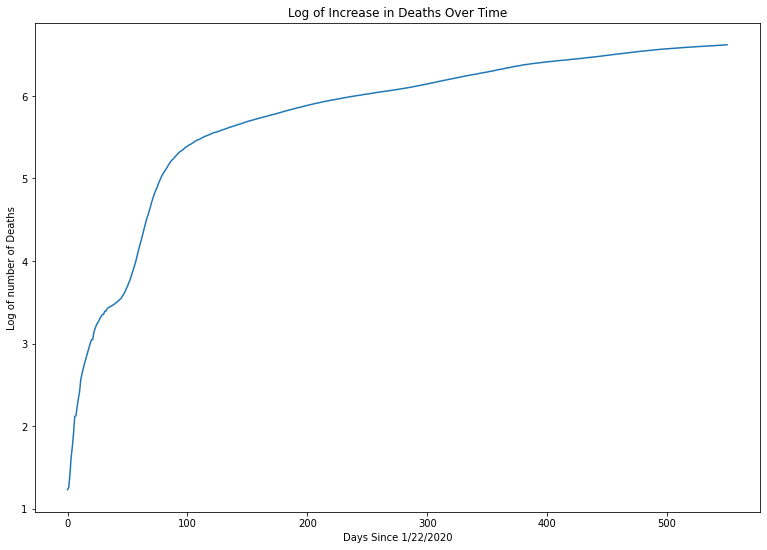

In [39]:
plt.figure(figsize=(13,9))
plt.plot(adjusted_dates, np.log10(total_deaths))
plt.title('Log of Increase in Deaths Over Time')
plt.xlabel('Days Since 1/22/2020')
plt.ylabel('Log of number of Deaths')
plt.show()

In [40]:
def country_info(country_name):
    country_cases = []
    country_deaths = []

    for i in dates:
        country_cases.append(df_confirmed[df_confirmed["Country/Region"] == country_name][i].sum())
        country_deaths.append(df_deaths[df_deaths["Country/Region"] == country_name][i].sum())

    return (country_cases, country_deaths)

In [41]:
def country_plot(x, y1, y2, y3, country):
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)


    plt.figure(figsize=(13,9))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)])
    plt.title('{} Confirmed Cases'.format(country))
    plt.xlabel('Days Since 1/22/2020')
    plt.ylabel('Number of Cases')
    plt.show()

    plt.figure(figsize=(13,9))
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)])
    plt.title('{} Daily Increases in Confirmed Cases'.format(country))
    plt.xlabel('Days Since 1/22/2020')
    plt.ylabel('Number of Cases')
    plt.show()

    plt.figure(figsize=(13,9))
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Deaths'.format(country)])
    plt.title('{} Daily Increases in Deaths'.format(country))
    plt.xlabel('Days Since 1/22/2020')
    plt.ylabel('Number of Cases')
    plt.show()

In [42]:
def country_visualizations(country_name):
    country_information = country_info(country_name)
    country_cases = country_information[0]
    country_deaths = country_information[1]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
    
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_name)

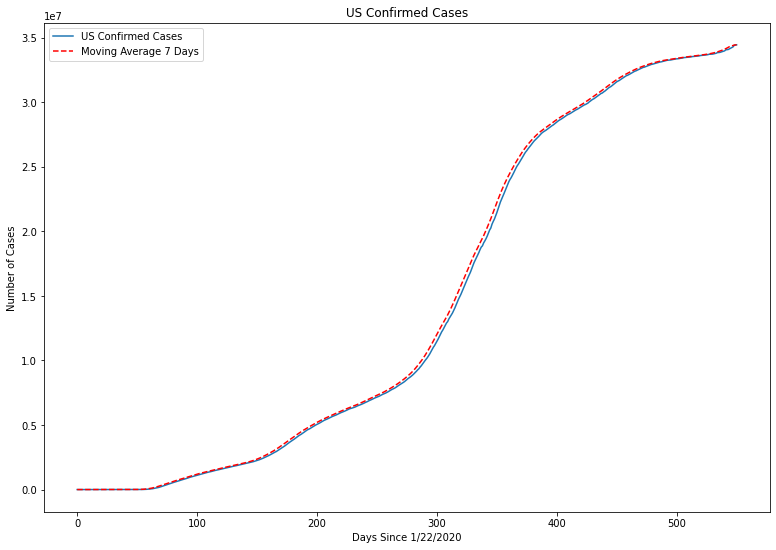

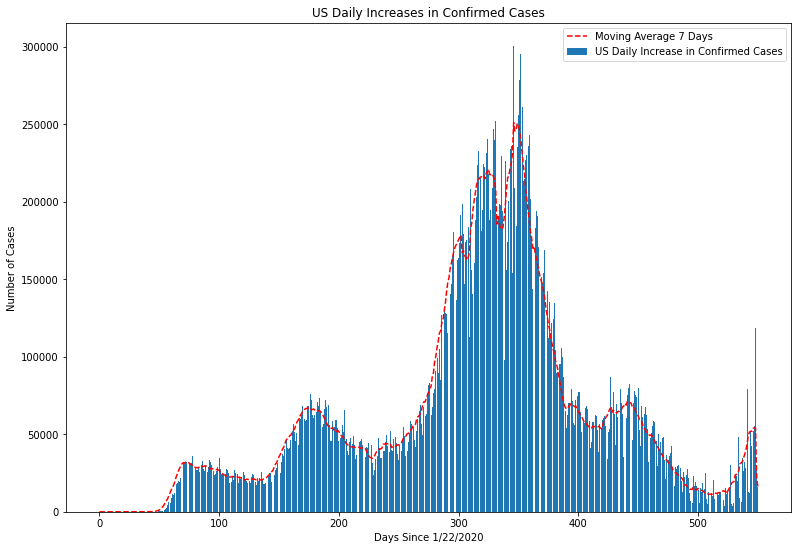

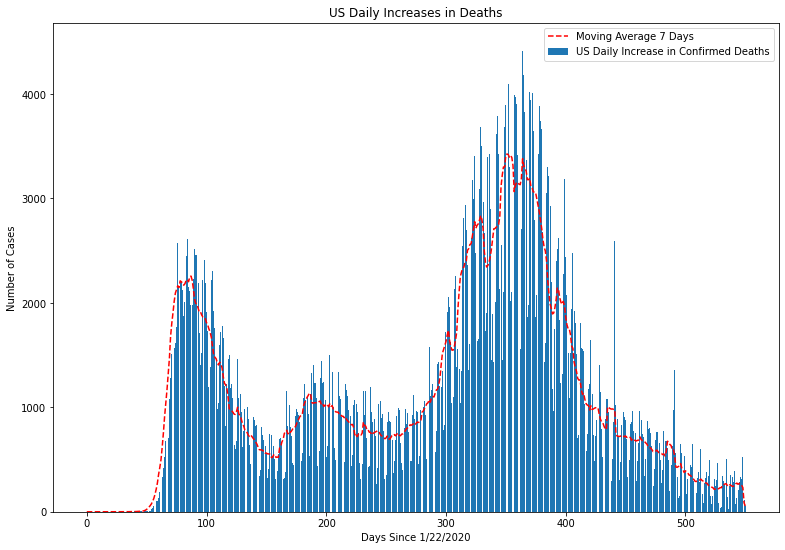

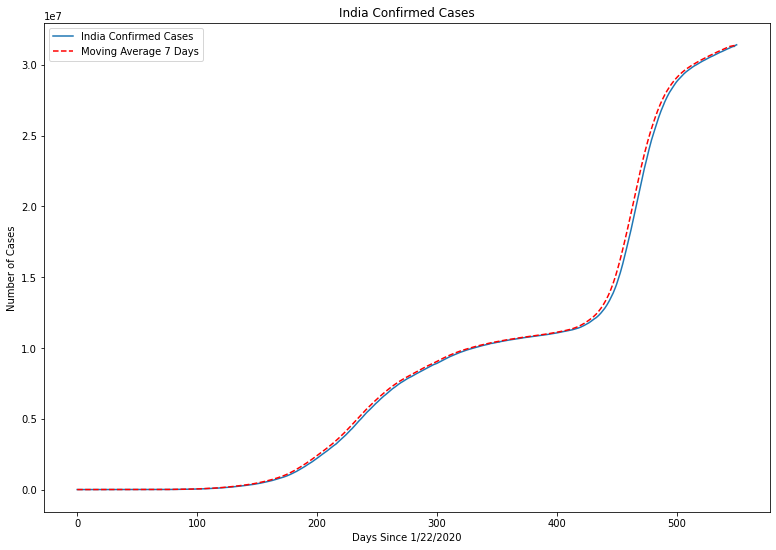

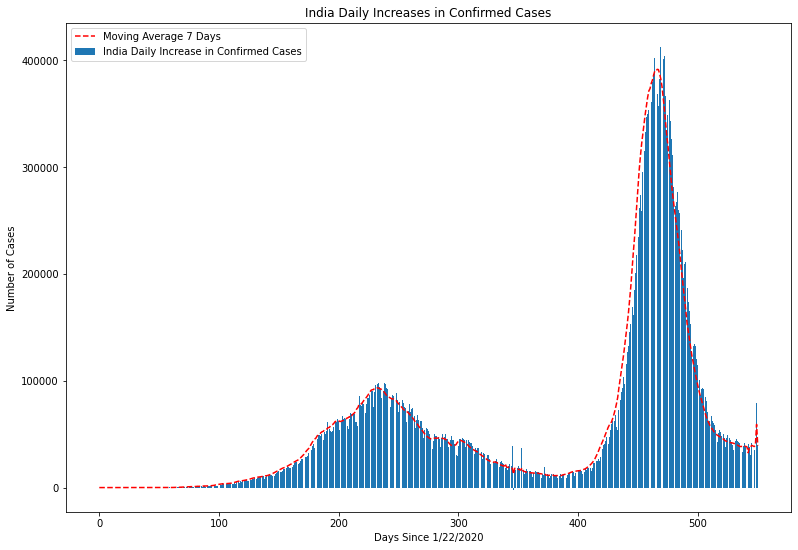

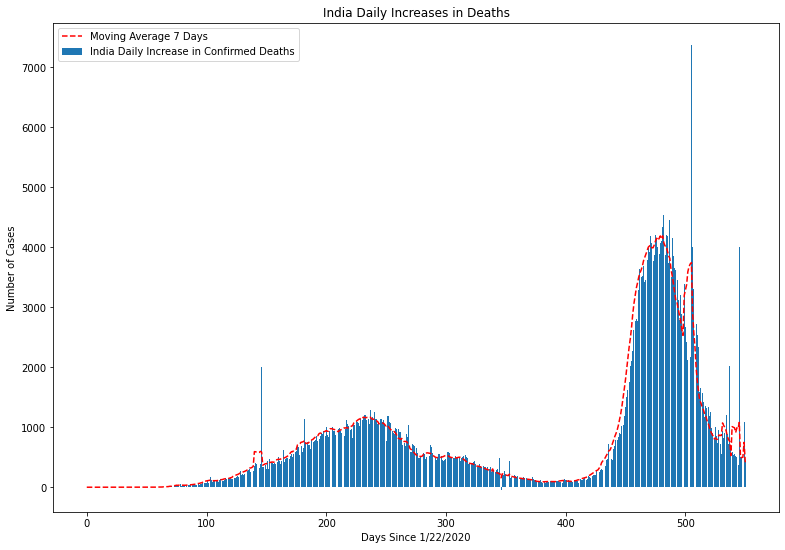

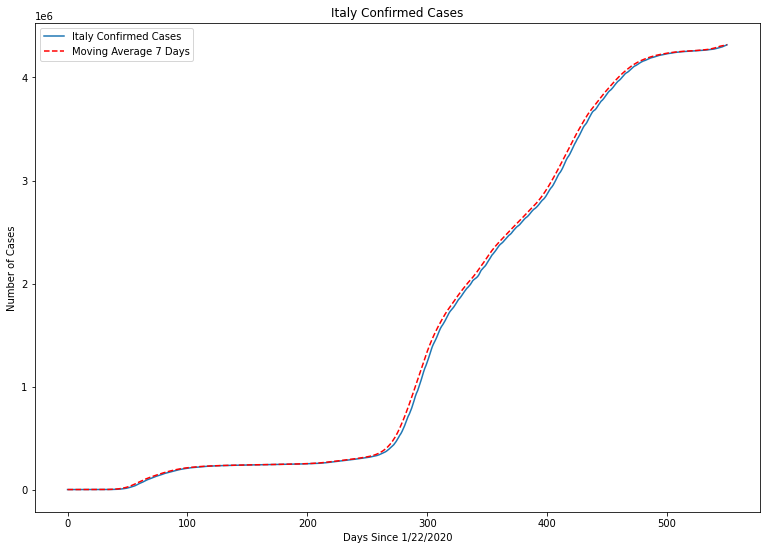

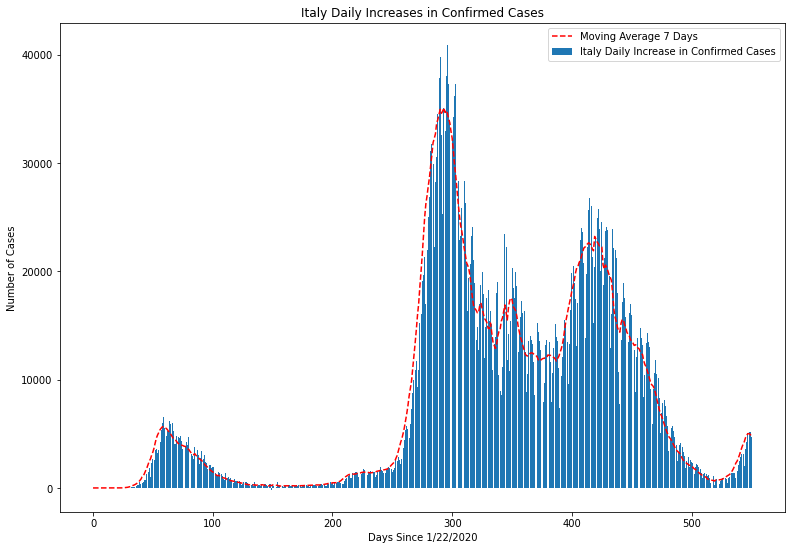

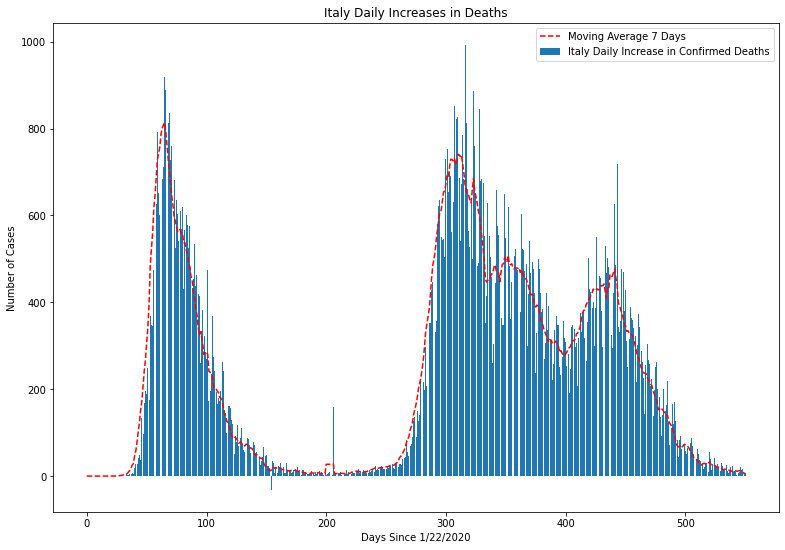

In [43]:
countries = ["US", "India", "Italy"]
for country in countries:
    country_visualizations(country)

In [44]:
compare_countries = ['India', 'US', 'Brazil', 'Russia', 'United Kingdom', 'France']
graph_name = ['Coronavirus Confirmed Cases', 'Coronavirus Confirmed Deaths']


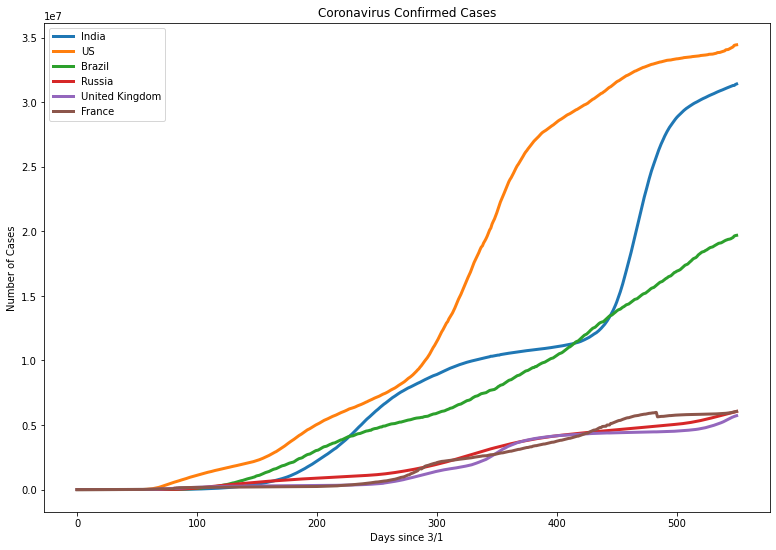

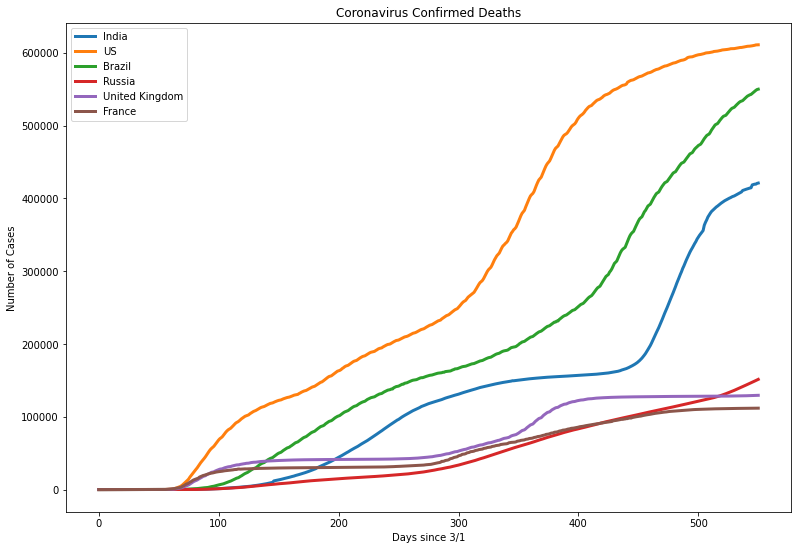

In [45]:
for num in range(2):
    plt.figure(figsize=(13,9))
    for country in compare_countries:
        plt.plot(country_info(country)[num], linewidth = "3")
    plt.legend(compare_countries)
    plt.xlabel('Days since 3/1')
    plt.ylabel('Number of Cases')
    plt.title(graph_name[num])
    plt.show()

In [46]:
def predictions_plot(x, y, algo, pred):
    plt.plot(x,y)
    plt.plot(future_forecast, pred)
    plt.title('Worldwide Coronavirus Cases Over Time')
    plt.xlabel('Days Since 1/22/2020')
    plt.ylabel('Number of Cases')
    plt.legend(['Confirmed Cases', algo])
    plt.show()

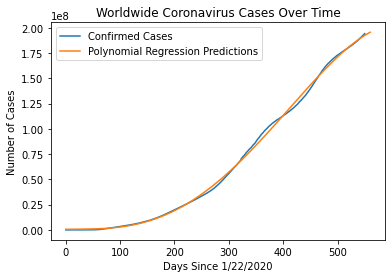

In [47]:
predictions_plot(adjusted_dates, world_cases, "Polynomial Regression Predictions", linear_pred)

In [48]:
linear_pred = linear_pred.reshape(1,-1)[0]
predicted_df = pd.DataFrame({"Date": future_forecast_dates[-10:], "Polynomial Predicted Coronavirus Cases": linear_pred[-10:]})
predicted_df.style.background_gradient(cmap = "Blues")

,Date,Polynomial Predicted Coronavirus Cases
0,07/26/2021,192793233.160075
1,07/27/2021,193119959.334531
2,07/28/2021,193442230.180036
3,07/29/2021,193760005.325841
4,07/30/2021,194073244.281095
5,07/31/2021,194381906.434848
6,08/01/2021,194685951.056047
7,08/02/2021,194985337.293540
8,08/03/2021,195280024.176073
9,08/04/2021,195569970.612293


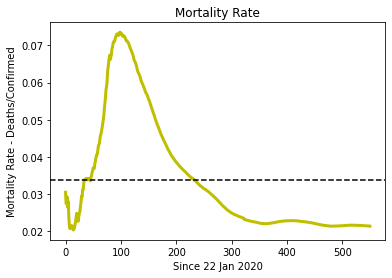

In [49]:
mean_mortality_rate = np.mean(mortality_rate)
plt.plot(adjusted_dates, mortality_rate, "y-", linewidth = "3", )
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title("Mortality Rate")
plt.xlabel("Since 22 Jan 2020")
plt.ylabel("Mortality Rate - Deaths/Confirmed")
plt.show()

In [50]:
latest_data.head(15)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-07-26 04:21:28,33.93911,67.709953,143439,6357,82586.0,54496.0,Afghanistan,368.469337,4.431849
1,NaN,NaN,NaN,Albania,2021-07-26 04:21:28,41.15330,20.168300,132875,2456,130139.0,280.0,Albania,4617.242338,1.848354
2,NaN,NaN,NaN,Algeria,2021-07-26 04:21:28,28.03390,1.659600,162155,4063,110577.0,47515.0,Algeria,369.785959,2.505627
3,NaN,NaN,NaN,Andorra,2021-07-26 04:21:28,42.50630,1.521800,14498,127,13988.0,383.0,Andorra,18763.994046,0.875983
4,NaN,NaN,NaN,Angola,2021-07-26 04:21:28,-11.20270,17.873900,41780,984,35474.0,5322.0,Angola,127.121217,2.355194
5,NaN,NaN,NaN,Antigua and Barbuda,2021-07-26 04:21:28,17.06080,-61.796400,1280,43,1229.0,8.0,Antigua and Barbuda,1307.082755,3.359375
6,NaN,NaN,NaN,Argentina,2021-07-26 04:21:28,-38.41610,-63.616700,4846615,103721,4493984.0,248910.0,Argentina,10723.601455,2.140071
7,NaN,NaN,NaN,Armenia,2021-07-26 04:21:28,40.06910,45.038200,228798,4587,219062.0,5149.0,Armenia,7721.226201,2.004825
8,NaN,NaN,Australian Capital Territory,Australia,2021-07-26 04:21:28,-35.47350,149.012400,124,3,121.0,0.0,"Australian Capital Territory, Australia",28.965195,2.419355
9,NaN,NaN,New South Wales,Australia,2021-07-26 04:21:28,-33.86880,151.209300,7943,62,0.0,7881.0,"New South Wales, Australia",97.844297,0.780562


In [51]:
unique_countries = list(latest_data["Country_Region"].unique())

In [52]:
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_incidence_rate = [] 
country_mortality_rate = []

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data["Country_Region"]==i]["Confirmed"].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)

In [53]:
unique_countries_df= pd.DataFrame({"Countries":unique_countries, "Confirmed Cases": country_confirmed_cases})
unique_countries_df

,Countries,Confirmed Cases
0,Afghanistan,143439
1,Albania,132875
2,Algeria,162155
3,Andorra,14498
4,Angola,41780
...,...,...
189,Vietnam,101173
190,West Bank and Gaza,316088
191,Yemen,7012
192,Zambia,192071


In [54]:
unique_countries_df = unique_countries_df.sort_values(by = "Confirmed Cases", ascending=False)

In [55]:
unique_countries = unique_countries_df["Countries"].values

In [56]:
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_active_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Active'].sum())
    country_incidence_rate.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Incident_Rate'].sum())
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])
    

In [57]:
country_df = pd.DataFrame({"Countries": unique_countries,
                           "Confirmed_Cases": [format(int(i), ',d') for i in country_confirmed_cases],
                           "Deaths": [format(int(i), ',d') for i in country_death_cases],
                           "Active_Cases": [format(int(i), ",d") for i in country_active_cases],
                           "Incidence_Rate": country_incidence_rate,
                           "Mortality_Rate": country_mortality_rate})

country_df.style.background_gradient(cmap = "Purples")

,Countries,Confirmed_Cases,Deaths,Active_Cases,Incidence_Rate,Mortality_Rate
0,US,"34,443,761","610,891",0,33120471.036275,0.017736
1,India,"31,411,262","420,967","411,189",130171.094133,0.013402
2,Brazil,"19,688,663","549,924","1,436,701",293428.649248,0.027931
3,France,"6,056,388","111,806","5,534,028",65286.279771,0.018461
4,Russia,"6,049,215","151,352","473,502",335003.434579,0.025020
5,United Kingdom,"5,723,399","129,446","5,575,727",76855.635225,0.022617
6,Turkey,"5,601,608","50,934","129,526",6641.771363,0.009093
7,Argentina,"4,846,615","103,721","248,910",10723.601455,0.021401
8,Colombia,"4,727,846","118,868","121,005",243485.270963,0.025142
9,Italy,"4,317,415","127,949","66,257",148756.541729,0.029636


In [58]:
unique_provinces = list(latest_data["Province_State"].unique())
unique_provinces

[nan,
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Antwerp',
 'Brussels',
 'East Flanders',
 'Flemish Brabant',
 'Hainaut',
 'Liege',
 'Limburg',
 'Luxembourg',
 'Namur',
 'Unknown',
 'Walloon Brabant',
 'West Flanders',
 'Acre',
 'Alagoas',
 'Amapa',
 'Amazonas',
 'Bahia',
 'Ceara',
 'Distrito Federal',
 'Espirito Santo',
 'Goias',
 'Maranhao',
 'Mato Grosso',
 'Mato Grosso do Sul',
 'Minas Gerais',
 'Para',
 'Paraiba',
 'Parana',
 'Pernambuco',
 'Piaui',
 'Rio Grande do Norte',
 'Rio Grande do Sul',
 'Rio de Janeiro',
 'Rondonia',
 'Roraima',
 'Santa Catarina',
 'Sao Paulo',
 'Sergipe',
 'Tocantins',
 'Alberta',
 'British Columbia',
 'Diamond Princess',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Northwest Territories',
 'Nova Scotia',
 'Nunavut',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Repatriated Travellers',
 'Saskatche

In [59]:
province_confirmed_cases = []
province_death_cases = []
province_active_cases =[]
province_incidence_rate = []
province_mortality_rate = []
province_country = []
no_cases_pro=[]

for province in unique_provinces:
    cases = latest_data[latest_data["Province_State"]==province]["Confirmed"].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases_pro.append(province)

for i in no_cases_pro:
    unique_provinces.remove(i)

In [60]:
province_df = pd.DataFrame({"Provinces": unique_provinces, "Confirmed_Cases": province_confirmed_cases})


In [61]:
province_df = province_df.sort_values(by = "Confirmed_Cases", ascending = False)


In [62]:
unique_provinces = province_df["Provinces"].values
unique_provinces[:10]

array(['Maharashtra', 'England', 'Sao Paulo', 'California', 'Kerala',
       'Texas', 'Karnataka', 'Tamil Nadu', 'Florida', 'New York'],
      dtype=object)

In [63]:
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data["Province_State"]== unique_provinces[i]]["Confirmed"].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    province_active_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Active'].sum())
    province_incidence_rate.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Incident_Rate'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [64]:
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 
                            'Country': province_country, 
                            'Number of Confirmed Cases': [format(int(i), ',d') for i in province_confirmed_cases],
                            'Number of Deaths': [format(int(i), ',d') for i in province_death_cases],
                            'Number of Active Cases' : [format(int(i), ',d') for i in province_active_cases], 
                            'Incidence Rate' : province_incidence_rate, 
                            'Mortality Rate': province_mortality_rate})


province_df.style.background_gradient(cmap='Oranges')

,Province/State Name,Country,Number of Confirmed Cases,Number of Deaths,Number of Active Cases,Incidence Rate,Mortality Rate
0,Maharashtra,India,"6,264,922","131,552","98,341",5087.467238,0.020998
1,England,United Kingdom,"4,972,040","113,534","4,858,506",8882.259206,0.022834
2,Sao Paulo,Brazil,"4,001,078","137,236","176,967",8713.329407,0.034300
3,California,US,"3,905,990","64,235",0,479372.553573,0.016445
4,Kerala,India,"3,271,530","16,035","140,779",9164.092560,0.004901
5,Texas,US,"3,077,513","53,018",0,2772566.276286,0.017228
6,Karnataka,India,"2,894,557","36,374","23,442",4284.253885,0.012566
7,Tamil Nadu,India,"2,548,497","33,911","23,364",3273.966494,0.013306
8,Florida,US,"2,523,510","38,670",0,745309.261539,0.015324
9,New York,US,"2,136,032","53,813",0,520549.690380,0.025193


In [65]:
india_states = list(latest_data[latest_data["Country_Region"]=="India"]["Province_State"].unique())


In [66]:
state_confirmed_cases = []
state_death_cases = []
state_active_cases =[]
state_incidence_rate = []
state_mortality_rate = []
state_country = []
no_cases_pro1=[]

for state in india_states:
    cases = latest_data[(latest_data["Province_State"]==state) & (latest_data["Country_Region"]== "India")]["Confirmed"].sum()
    if cases > 0:
        state_confirmed_cases.append(cases)
    else:
        no_cases_pro1.append(state)

for i in no_cases_pro1:
    india_states.remove(i)

In [67]:
india_df = pd.DataFrame({"States": india_states, "Confirmed Cases" : state_confirmed_cases})


In [68]:

india_df = india_df.sort_values(by = "Confirmed Cases", ascending = False)


In [69]:
india_states = india_df["States"].values

In [70]:
for i in range(len(india_states)):
    state_confirmed_cases[i] = latest_data[(latest_data["Province_State"]==india_states[i]) & (latest_data["Country_Region"]=="India")]["Confirmed"].sum()
    state_country.append(latest_data[(latest_data['Province_State']==india_states[i]) & (latest_data["Country_Region"]=="India")]['Country_Region'].unique()[0])
    state_death_cases.append(latest_data[latest_data['Province_State']==india_states[i]]['Deaths'].sum())
    state_active_cases.append(latest_data[latest_data['Province_State']==india_states[i]]['Active'].sum())
    state_incidence_rate.append(latest_data[latest_data['Province_State']==india_states[i]]['Incident_Rate'].sum())
    state_mortality_rate.append(state_death_cases[i]/state_confirmed_cases[i])

In [71]:
only_india_df = pd.DataFrame({'State': india_states, 
                            'Country': state_country, 
                            'Confirmed Cases': [format(int(i), ',d') for i in state_confirmed_cases],
                            'Deaths': [format(int(i), ',d') for i in state_death_cases],
                            'Active Cases' : [format(int(i), ',d') for i in state_active_cases], 
                            'Incidence Rate' : state_incidence_rate, 
                            'Mortality Rate': state_mortality_rate})


#only_india_df.style.background_gradient(cmap='Reds')
only_india_df

,State,Country,Confirmed Cases,Deaths,Active Cases,Incidence Rate,Mortality Rate
0,Maharashtra,India,"6,264,922","131,552","98,341",5087.467238,0.020998
1,Kerala,India,"3,271,530","16,035","140,779",9164.092560,0.004901
2,Karnataka,India,"2,894,557","36,374","23,442",4284.253885,0.012566
3,Tamil Nadu,India,"2,548,497","33,911","23,364",3273.966494,0.013306
4,Andhra Pradesh,India,"1,954,765","13,256","22,155",3626.422923,0.006781
5,Uttar Pradesh,India,"1,708,155","22,750",868,718.066013,0.013318
6,West Bengal,India,"1,523,639","18,073","11,796",1529.615161,0.011862
7,Delhi,India,"1,435,910","25,043",579,7674.180888,0.017441
8,Chhattisgarh,India,"1,001,167","13,516","2,738",3401.138549,0.013500
9,Odisha,India,"967,548","5,512","16,859",2087.196973,0.005697


In [72]:
total_world_cases = np.sum(country_confirmed_cases)
india_cases  = latest_data[latest_data["Country_Region"]=="India"]["Confirmed"].sum()
outside_india_cases = total_world_cases - india_cases

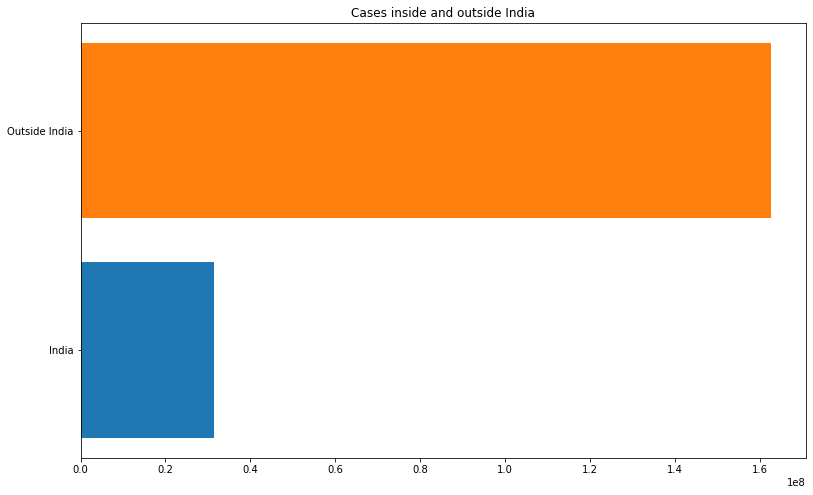

In [73]:
plt.figure(figsize=(13, 8))
plt.barh('India', india_cases)
plt.barh('Outside India', outside_india_cases)
plt.title("Cases inside and outside India")
plt.show()

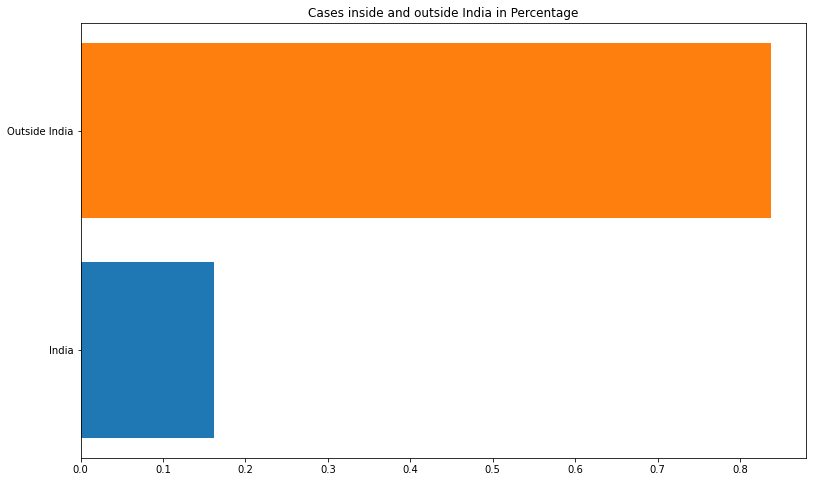

In [74]:
plt.figure(figsize=(13, 8))
plt.barh('India', india_cases/total_world_cases)
plt.barh('Outside India', outside_india_cases/total_world_cases)
plt.title("Cases inside and outside India in Percentage")
plt.show()

In [75]:
print('Outside India {} cases ({}%):'.format(outside_india_cases, np.round((outside_india_cases/total_world_cases)*100, 1)))
print('India {} cases ({}%)'.format(india_cases, np.round((india_cases/total_world_cases)*100, 1)))
print('Total: {} cases'.format(total_world_cases))

Outside India 162751927 cases (83.8%):
India 31411262 cases (16.2%)
Total: 194163189 cases


In [76]:
#graph for top 10 countries and rest categorized as Others
bar_country = []
bar_country_cases = []

for i in range(len(country_confirmed_cases)):
    if i < 10:
        bar_country.append(unique_countries[i])
        bar_country_cases.append(country_confirmed_cases[i])

    else:
        bar_country.append("Others")
        bar_country_cases.append(np.sum(country_confirmed_cases[10:]))
        break


In [77]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(13, 8))
    plt.barh(x, y)
    plt.title(title)
    plt.show()

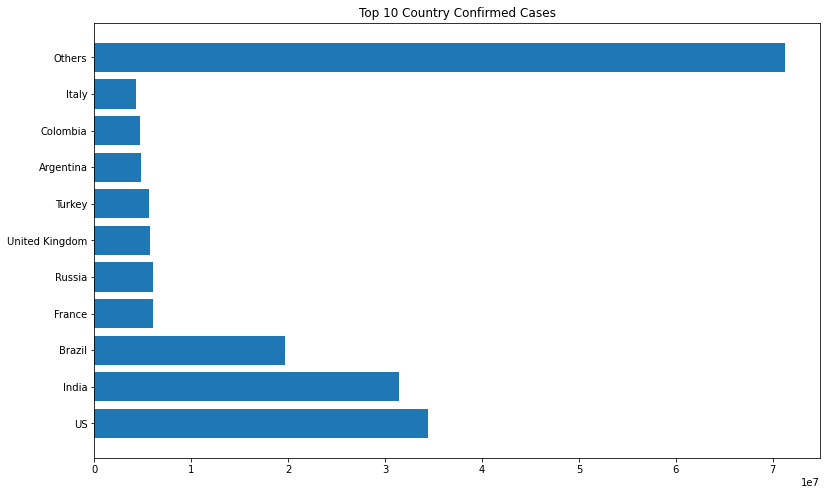

In [78]:
plot_bar_graphs(bar_country, bar_country_cases, "Top 10 Country Confirmed Cases")

In [79]:
bar_province = []
bar_province_cases = []

for i in range(len(province_confirmed_cases)):
    if i < 10:
        bar_province.append(unique_provinces[i])
        bar_province_cases.append(province_confirmed_cases[i])

    else:
        bar_province.append("Others")
        bar_province_cases.append(np.sum(province_confirmed_cases[10:]))
        break


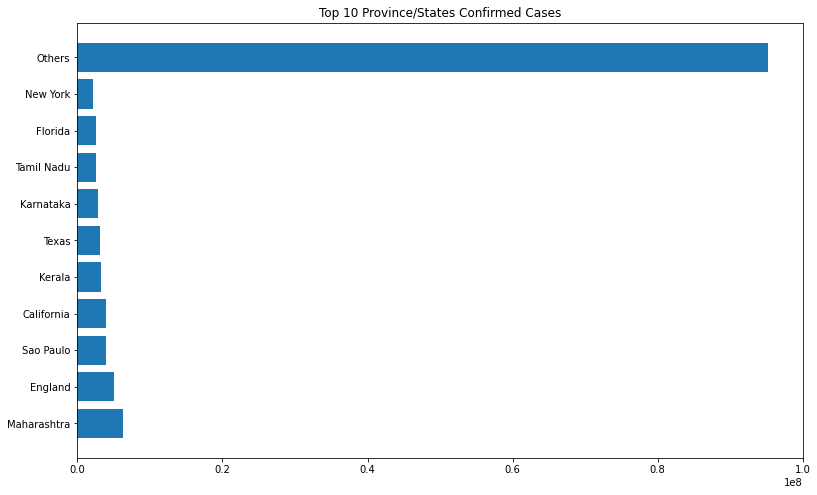

In [80]:
plot_bar_graphs(bar_province, bar_province_cases, "Top 10 Province/States Confirmed Cases")

In [81]:
def plot_pie_charts(x, y, title):
    c = ['blue', 'green', 'yellow', 'purple', 'black',
        'red', 'violet', 'khaki', 'brown', 'coral', 'pink']
    plt.figure(figsize=(16,14))
    plt.title(title)
    plt.pie(y, colors=c, labels=y)
    plt.legend(x)
    plt.show()

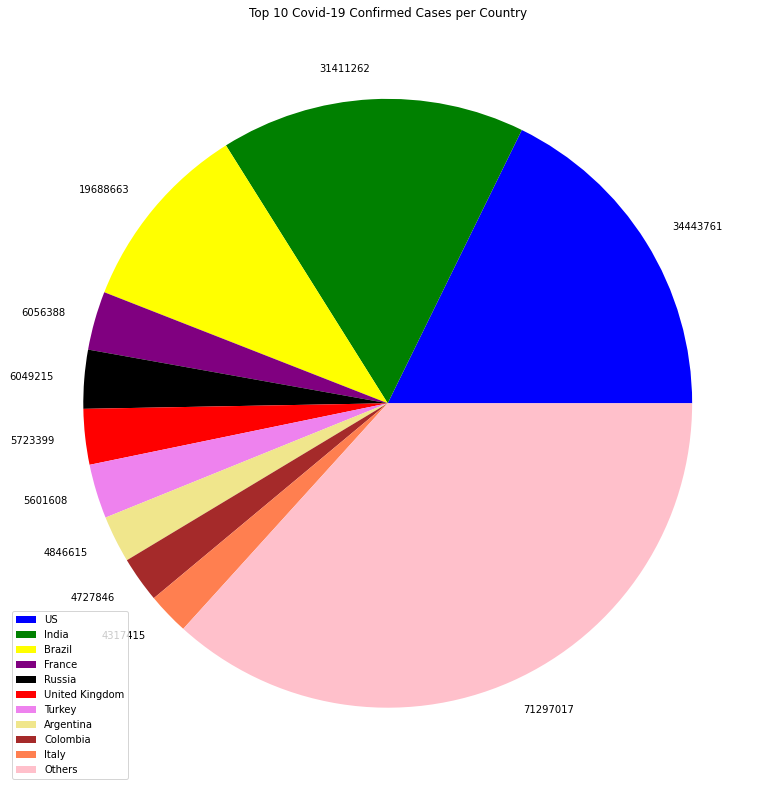

In [82]:
plot_pie_charts(bar_country, bar_country_cases, 'Top 10 Covid-19 Confirmed Cases per Country')

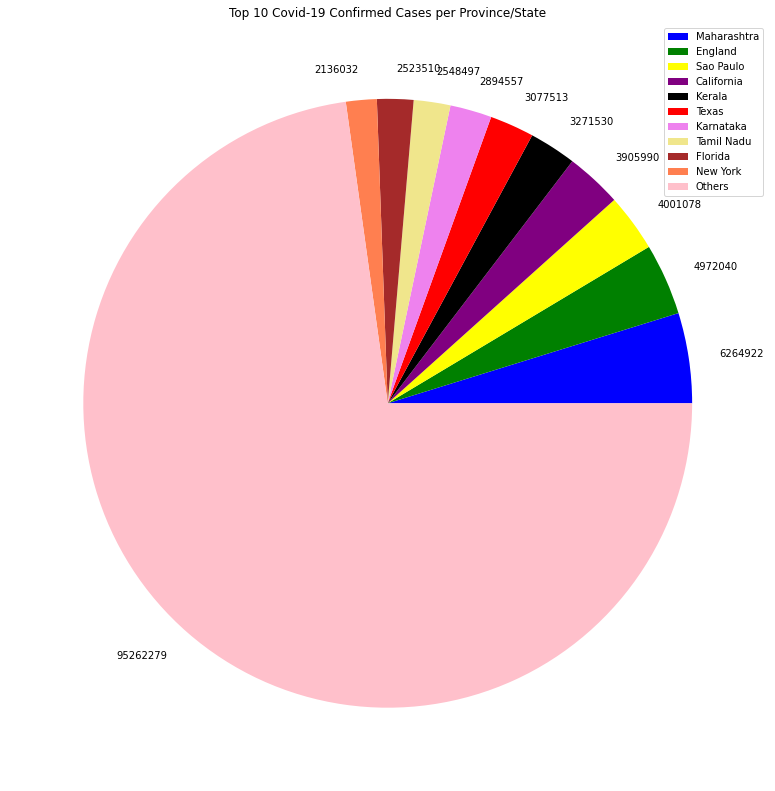

In [83]:
plot_pie_charts(bar_province, bar_province_cases, 'Top 10 Covid-19 Confirmed Cases per Province/State')

In [84]:
bar_india_states = []
bar_india_states_cases = []

for i in range(len(state_confirmed_cases)):
    if i < 10:
        bar_india_states.append(india_states[i])
        bar_india_states_cases.append(state_confirmed_cases[i])

    else:
        bar_india_states.append("Others")
        bar_india_states_cases.append(np.sum(state_confirmed_cases[10:]))
        break



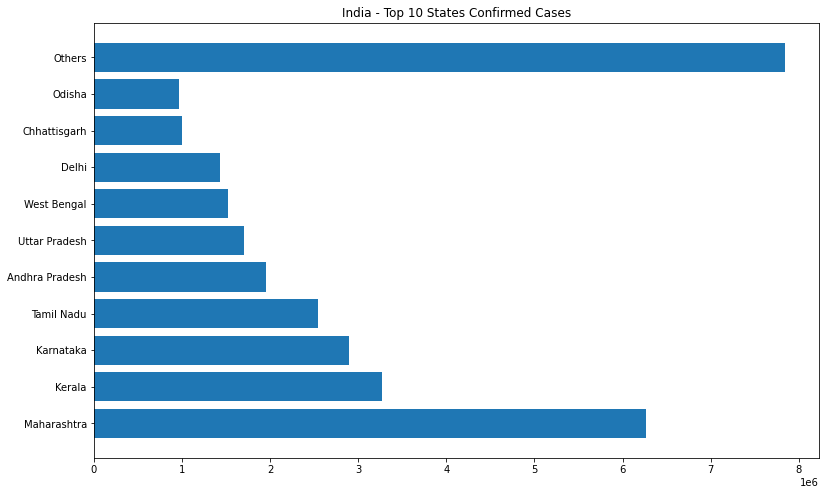

In [85]:
plot_bar_graphs(bar_india_states, bar_india_states_cases, "India - Top 10 States Confirmed Cases")

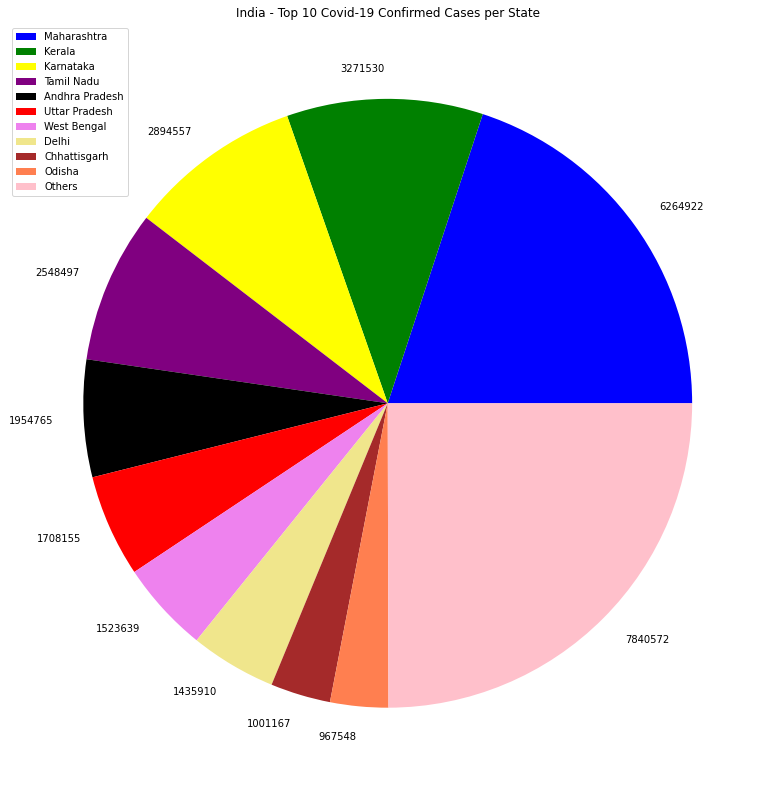

In [86]:
plot_pie_charts(bar_india_states, bar_india_states_cases, 'India - Top 10 Covid-19 Confirmed Cases per State')